<a href="https://colab.research.google.com/github/Matt44320/fraud_analysis/blob/main/Case_Incognia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing the database

In [ ]:
caminho = "/content/drive/MyDrive/Colab Notebooks/Incognia/incognia_db_for_da_test (2) (1).csv"

df = pd.read_csv(caminho)
df.head()

,event_id,event_timestamp,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store
0,59bcca18-c726,1626129284228,1893155083,1801928094,1.852865,527,False,False,False,True
1,64c883df-2a7b,1625756852352,2050114867,1971517057,36.260014,184,False,False,False,True
2,527f8468-6a6a,1626127805052,422735906,1956878295,226.411294,92,False,False,False,True
3,e062b8d9-6b5a,1626134745445,1766209306,1208828324,0.110275,366,False,False,False,True
4,a5099dd8-ac00,1626792460766,1860027669,1768952722,1.732900,278,False,False,False,True


# Descriptive analysis

In [ ]:
df['data'] = df['event_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000.0))
df.head()

,event_id,event_timestamp,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
0,59bcca18-c726,1626129284228,1893155083,1801928094,1.852865,527,False,False,False,True,2021-07-12 22:34:44.228
1,64c883df-2a7b,1625756852352,2050114867,1971517057,36.260014,184,False,False,False,True,2021-07-08 15:07:32.352
2,527f8468-6a6a,1626127805052,422735906,1956878295,226.411294,92,False,False,False,True,2021-07-12 22:10:05.052
3,e062b8d9-6b5a,1626134745445,1766209306,1208828324,0.110275,366,False,False,False,True,2021-07-13 00:05:45.445
4,a5099dd8-ac00,1626792460766,1860027669,1768952722,1.732900,278,False,False,False,True,2021-07-20 14:47:40.766


In [ ]:
min = df['data'].min()
max = df['data'].max()

print(f'O dataset registra eventos ocorridos entre o dia {min} e o dia {max}.') 

O dataset registra eventos ocorridos entre o dia 2021-07-01 00:01:21.146000 e o dia 2021-07-31 23:59:58.105000.


In [ ]:
df.drop('event_timestamp', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444758 entries, 0 to 444757
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   event_id                       444758 non-null  object        
 1   account_id                     444758 non-null  int64         
 2   device                         444758 non-null  int64         
 3   distance_to_frequent_location  444080 non-null  float64       
 4   device_age_days                444758 non-null  int64         
 5   is_emulator                    444758 non-null  bool          
 6   has_fake_location              444758 non-null  bool          
 7   has_root_permissions           444758 non-null  bool          
 8   app_is_from_official_store     444758 non-null  bool          
 9   data                           444758 non-null  datetime64[ns]
dtypes: bool(4), datetime64[ns](1), float64(1), int64(3), object(1)
memor

There are some mising data in the column "distance_to_frequent_location". Let's check if this could likely be a fraudulent event.

In [ ]:
df_missing = df[df['distance_to_frequent_location'].isnull()]
df_missing

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
316,d9f1bd6a-0ed3,765518161,1921744396,NaN,0,False,False,False,True,2021-07-28 01:08:39.270
514,2a606bb8-635d,999839408,2133620111,NaN,0,False,False,False,True,2021-07-20 23:32:21.563
802,5bbb3749-d4e9,1802045378,908005998,NaN,2,False,False,False,True,2021-07-14 20:28:09.343
1628,6b2670c6-d32d,1096280190,1975585989,NaN,24,False,False,False,True,2021-07-06 02:37:03.810
2221,13f67e20-9ce9,332838423,942203533,NaN,123,False,False,False,True,2021-07-29 16:04:02.501
...,...,...,...,...,...,...,...,...,...,...
441485,ef384db5-9ce0,1908992445,1204802355,NaN,0,False,False,False,True,2021-07-24 13:38:28.551
442825,4e080ea7-2f7b,241283599,524905774,NaN,0,False,False,False,True,2021-07-27 16:45:25.681
443665,3f5632f0-63d7,1978670569,1163192545,NaN,6,False,False,False,True,2021-07-28 21:39:26.905
443778,e3d7a001-c381,291688591,1735189466,NaN,78,False,False,False,True,2021-07-31 10:46:30.469


In [ ]:
df_missing[df_missing['has_fake_location'] == True]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data


In [ ]:
df_missing[df_missing['is_emulator'] == True]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data


In [ ]:
df_missing[df_missing['has_root_permissions'] == True]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
17339,0c2b9a7f-94e6,1345104690,314632218,NaN,0,False,False,True,True,2021-07-23 19:49:44.463
191550,195cf0af-b0be,727433780,2134275963,NaN,0,False,False,True,True,2021-07-26 12:15:50.562
231045,3e3252af-944f,353669857,1321910024,NaN,0,False,False,True,True,2021-07-01 03:48:12.414


Here, we notice that without the location informed, we have 3 records with root permissions and where the device age is 0. It is most likely to be a fraudulent activity.

In [ ]:
df.head()

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
0,59bcca18-c726,1893155083,1801928094,1.852865,527,False,False,False,True,2021-07-12 22:34:44.228
1,64c883df-2a7b,2050114867,1971517057,36.260014,184,False,False,False,True,2021-07-08 15:07:32.352
2,527f8468-6a6a,422735906,1956878295,226.411294,92,False,False,False,True,2021-07-12 22:10:05.052
3,e062b8d9-6b5a,1766209306,1208828324,0.110275,366,False,False,False,True,2021-07-13 00:05:45.445
4,a5099dd8-ac00,1860027669,1768952722,1.732900,278,False,False,False,True,2021-07-20 14:47:40.766


In [ ]:
df.describe().round(2)

,account_id,device,distance_to_frequent_location,device_age_days
count,4.447580e+05,4.447580e+05,444080.00,444758.00
mean,1.073463e+09,1.072632e+09,5257.79,202.46
std,6.198954e+08,6.196676e+08,99762.07,168.70
min,1.552000e+03,1.960300e+04,0.00,0.00
25%,5.362848e+08,5.360730e+08,1.85,60.00
50%,1.072615e+09,1.072728e+09,5.95,157.00
75%,1.610361e+09,1.611280e+09,30.76,308.00
max,2.147478e+09,2.147470e+09,15424747.66,550.00


In [ ]:
df['distance_to_frequent_location'].median().round(2)

5.95

In [ ]:
df['device_age_days'].median().round(2)

157.0

In [ ]:
df['is_emulator'].value_counts()

False    444756
True          2
Name: is_emulator, dtype: int64

In [ ]:
df['has_fake_location'].value_counts()

False    444725
True         33
Name: has_fake_location, dtype: int64

In [ ]:
df['has_root_permissions'].value_counts()

False    444302
True        456
Name: has_root_permissions, dtype: int64

In [ ]:
df['app_is_from_official_store'].value_counts()

True     444151
False       607
Name: app_is_from_official_store, dtype: int64

In [ ]:
df2 = df[['event_id','distance_to_frequent_location','device_age_days']]
df2.head()

,event_id,distance_to_frequent_location,device_age_days
0,59bcca18-c726,1.852865,527
1,64c883df-2a7b,36.260014,184
2,527f8468-6a6a,226.411294,92
3,e062b8d9-6b5a,0.110275,366
4,a5099dd8-ac00,1.732900,278


In [ ]:
df.columns

Index(['event_id', 'account_id', 'device', 'distance_to_frequent_location',
       'device_age_days', 'is_emulator', 'has_fake_location',
       'has_root_permissions', 'app_is_from_official_store', 'data'],
      dtype='object')

<Axes: >

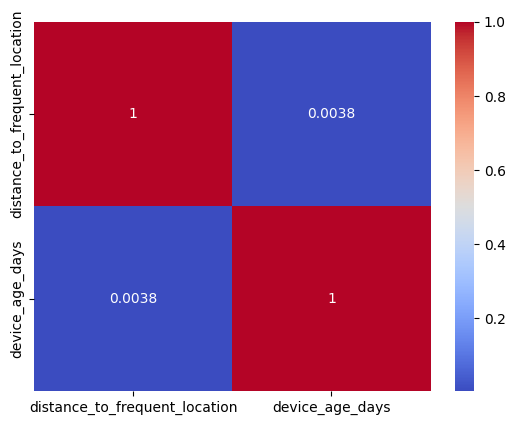

In [ ]:
corr = df[['distance_to_frequent_location',
       'device_age_days']].corr("pearson")
sns.heatmap(corr, annot=True, cmap="coolwarm")

## High risk patterns

In [ ]:
df_highrisk = df[df['app_is_from_official_store'] == False]
df_highrisk

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
1671,d02b197a-9fa5,564935357,1211842529,19.987921,92,False,False,False,False,2021-07-04 10:21:00.770
2242,93aa2463-e792,949536148,1022639456,49.796043,57,False,False,False,False,2021-07-25 01:03:08.108
2762,2002c612-e6fd,1345859648,1854599133,1.401492,4,False,False,False,False,2021-07-11 14:42:53.434
2903,7f5bc8b4-f424,2133749324,1706893194,2.112707,6,False,False,False,False,2021-07-19 10:58:53.911
2924,f65ba0ba-fa35,1703835892,2134981291,0.702316,7,False,False,False,False,2021-07-23 23:47:57.676
...,...,...,...,...,...,...,...,...,...,...
441205,b256d9f5-3d54,1710347346,1895816884,6.630694,375,False,False,False,False,2021-07-24 02:32:27.579
441247,b853da4b-8512,924554947,499805389,255.136666,0,False,False,False,False,2021-07-01 15:10:55.062
442310,11a31365-35a1,1961764635,1705441831,1.857687,2,False,False,False,False,2021-07-15 17:43:17.895
443103,d9158af5-4338,1136480617,802269078,21.159345,510,False,False,False,False,2021-07-05 19:24:03.214


In [ ]:
df_highrisk.describe().round(2)

,account_id,device,distance_to_frequent_location,device_age_days
count,6.070000e+02,6.070000e+02,604.00,607.00
mean,1.137097e+09,1.083274e+09,7502.87,88.20
std,6.040573e+08,6.341554e+08,98971.94,144.92
min,2.860794e+06,6.463370e+06,0.00,0.00
25%,6.629319e+08,5.418161e+08,1.87,2.00
50%,1.148420e+09,1.096979e+09,4.94,11.00
75%,1.665331e+09,1.659233e+09,24.82,97.50
max,2.138215e+09,2.146319e+09,1699014.60,548.00


In [ ]:
df_highrisk2 = df[df['is_emulator'] == True]
df_highrisk2

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
29645,275811e0-17b7,442820130,1425676062,14.859064,0,True,False,True,True,2021-07-14 21:18:29.487
303682,02af1cf7-6d60,368105870,1049622868,1.695997,25,True,False,False,True,2021-07-05 14:24:41.389


In [ ]:
df[df['device'] == 1425676062 ]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
29645,275811e0-17b7,442820130,1425676062,14.859064,0,True,False,True,True,2021-07-14 21:18:29.487


In [ ]:
df[df['device'] == 1049622868]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
303682,02af1cf7-6d60,368105870,1049622868,1.695997,25,True,False,False,True,2021-07-05 14:24:41.389


In [ ]:
df_highrisk2.describe().round(2)

,account_id,device,distance_to_frequent_location,device_age_days
count,2.0,2.000000e+00,2.00,2.00
mean,405463000.0,1.237649e+09,8.28,12.50
std,52830959.9,2.659098e+08,9.31,17.68
min,368105870.0,1.049623e+09,1.70,0.00
25%,386784435.0,1.143636e+09,4.99,6.25
50%,405463000.0,1.237649e+09,8.28,12.50
75%,424141565.0,1.331663e+09,11.57,18.75
max,442820130.0,1.425676e+09,14.86,25.00


In [ ]:
df_ordenado = df.sort_values('distance_to_frequent_location', ascending=False)
df_15_maiores_distancias = df_ordenado.head(15)
df_15_maiores_distancias

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
434110,a696c3e5-93c7,1237508632,307427106,1.542475e+07,538,False,False,False,True,2021-07-19 23:06:17.687
186586,0abc51de-8746,173831203,758050610,1.285515e+07,73,False,False,False,True,2021-07-20 00:37:35.094
93125,7e23052e-6ac1,1171546953,861447247,1.040559e+07,28,False,False,True,True,2021-07-07 19:53:11.781
134747,e19bec9e-4869,1190068735,1937794778,9.986593e+06,139,False,False,False,True,2021-07-15 19:29:56.587
350652,84bda926-dd19,1481323795,1094902520,9.959918e+06,395,False,False,False,True,2021-07-31 23:50:05.115
251369,c731b1f6-e1f0,1349870694,1684819211,9.702195e+06,94,False,False,False,True,2021-07-26 21:55:59.474
418187,04093f8f-8e3a,20917941,1129915798,9.616624e+06,98,False,False,False,True,2021-07-28 08:44:30.573
348724,eede44d2-8286,80279668,1095364005,9.405160e+06,92,False,False,False,True,2021-07-28 21:02:48.868
358957,308d2859-862d,1768785840,988496585,9.267286e+06,490,False,False,False,True,2021-07-28 06:03:08.235
62193,3c0d1183-35e7,2123865747,1885253366,8.551012e+06,0,False,False,False,True,2021-07-23 18:35:47.186


# Most active customers

In [ ]:
df['device'].value_counts().sort_values(ascending = False)

1599002029    36
1456274562    35
769274133     28
1506883993    26
801266557     24
              ..
1291707832     1
549778381      1
1770830950     1
1749358705     1
1420480146     1
Name: device, Length: 280620, dtype: int64

## Customer 1

In [ ]:
customer_1 = df[df['device'] == 1599002029].sort_values("data", ascending = True)
customer_1

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
47218,eb74236a-6a45,522769103,1599002029,1.501790,2,False,False,False,True,2021-07-01 18:43:44.751
307897,39ce3419-8c43,915776137,1599002029,9.765214,3,False,False,False,True,2021-07-02 23:31:06.466
302806,e6662ee9-d597,1771688397,1599002029,1.445536,4,False,False,False,True,2021-07-03 14:11:21.397
53973,918efa57-393d,287592237,1599002029,1.368841,4,False,False,False,True,2021-07-03 15:50:30.444
5408,1407e2c0-300f,2087895434,1599002029,9.870380,5,False,False,False,True,2021-07-04 04:11:43.949
44083,75fe7951-a251,288942362,1599002029,1.776238,5,False,False,False,True,2021-07-04 04:56:45.391
347361,1c7da1bf-cb4c,215121098,1599002029,2.279538,5,False,False,False,True,2021-07-04 15:11:27.314
36606,c9884aab-abb9,1780823480,1599002029,2.160842,6,False,False,False,True,2021-07-05 10:07:04.978
427379,3325e562-84be,2092697190,1599002029,3.519928,6,False,False,False,True,2021-07-05 16:32:43.705
288471,6d83e60f-fedb,1112948158,1599002029,1.962673,6,False,False,False,True,2021-07-05 21:48:18.317


In [ ]:
customer_1.describe()

,account_id,device,distance_to_frequent_location,device_age_days
count,3.600000e+01,3.600000e+01,36.000000,36.000000
mean,1.002442e+09,1.599002e+09,3.758566,11.250000
std,5.863835e+08,0.000000e+00,3.094212,7.947596
min,8.779592e+07,1.599002e+09,0.978323,2.000000
25%,5.254415e+08,1.599002e+09,1.746752,6.000000
50%,9.529443e+08,1.599002e+09,2.251720,8.500000
75%,1.542037e+09,1.599002e+09,4.589244,11.000000
max,2.092697e+09,1.599002e+09,11.475823,31.000000


## Customer 2

In [ ]:
customer_2 = df[df['device'] == 1456274562].sort_values("data", ascending = True)
customer_2

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
291912,87c6da9b-d88a,515166947,1456274562,2.291839,216,False,False,False,True,2021-07-01 15:51:35.921
422564,1c83cf0b-88c0,21354526,1456274562,2.711261,216,False,False,False,True,2021-07-01 20:27:08.465
198696,5a791edc-6e43,1606068407,1456274562,2.595589,218,False,False,False,True,2021-07-03 09:36:44.946
278916,abc4c02c-a489,7844684,1456274562,2.957264,218,False,False,False,True,2021-07-03 12:46:31.257
152939,1ae6ced4-79f5,654971682,1456274562,1.508695,218,False,False,False,True,2021-07-03 13:05:37.594
416465,ce1b5adc-ebbb,1259847839,1456274562,2.566251,218,False,False,False,True,2021-07-03 21:31:02.629
128887,3baeb9ff-6817,1754859354,1456274562,1.420725,219,False,False,False,True,2021-07-04 13:07:22.011
312235,356e3a96-7872,1374779486,1456274562,3.531612,219,False,False,False,True,2021-07-04 18:03:28.112
212814,93309dbc-c632,1510543311,1456274562,0.443106,220,False,False,False,True,2021-07-05 13:58:08.631
395904,34e4ae8f-e893,1906691782,1456274562,0.866533,220,False,False,False,True,2021-07-05 22:15:23.201


In [ ]:
customer_2.describe()

,account_id,device,distance_to_frequent_location,device_age_days
count,3.500000e+01,3.500000e+01,35.000000,35.000000
mean,1.173240e+09,1.456275e+09,45.881681,227.514286
std,6.854285e+08,0.000000e+00,153.577785,8.444878
min,7.844684e+06,1.456275e+09,0.222390,216.000000
25%,5.906177e+08,1.456275e+09,1.395630,220.000000
50%,1.259848e+09,1.456275e+09,3.531612,227.000000
75%,1.826476e+09,1.456275e+09,11.260081,234.000000
max,2.073570e+09,1.456275e+09,660.369055,243.000000


## Customer 3

In [ ]:
customer_3 = df[df['device'] == 769274133].sort_values("data", ascending = True)
customer_3

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
127815,2c85a302-4f79,1937443829,769274133,3.782259,301,False,False,False,True,2021-07-01 08:08:01.964,28,0
215014,b69f3fe6-c3f7,1344009753,769274133,1.754039,302,False,False,False,True,2021-07-01 22:10:39.571,28,0
134073,dcada08f-0fd6,1197556082,769274133,0.496246,302,False,False,False,True,2021-07-01 23:01:49.322,28,0
267930,a52c5f92-5559,724021336,769274133,1.754039,302,False,False,False,True,2021-07-02 07:18:41.613,28,0
290215,80bbbac9-8fe0,480529569,769274133,3.163847,302,False,False,False,True,2021-07-02 09:41:59.057,28,0
339412,9b23d5bd-f3e3,256423518,769274133,1.458832,305,False,False,False,True,2021-07-05 10:19:03.950,28,0
170598,d2a387f7-be1c,1707661379,769274133,1.160662,307,False,False,False,True,2021-07-06 17:24:32.581,28,0
307151,e21a2062-7937,1878941911,769274133,22.395479,307,False,False,False,True,2021-07-07 12:00:05.269,28,0
317298,d24247ae-07f3,202406233,769274133,0.565570,308,False,False,False,True,2021-07-08 11:43:07.552,28,0
300936,377104c3-ca28,1270526596,769274133,0.647135,309,False,False,False,True,2021-07-08 18:17:52.605,28,0


In [ ]:
customer_3.describe()

,account_id,device,distance_to_frequent_location,device_age_days,qty_same_device,risk_level
count,2.800000e+01,28.0,28.000000,28.000000,28.0,28.0
mean,1.196848e+09,769274133.0,2.286201,313.750000,28.0,0.0
std,5.619151e+08,0.0,4.053948,8.682144,0.0,0.0
min,2.024062e+08,769274133.0,0.110906,301.000000,28.0,0.0
25%,7.726743e+08,769274133.0,0.849382,307.000000,28.0,0.0
50%,1.234041e+09,769274133.0,1.590429,314.500000,28.0,0.0
75%,1.714786e+09,769274133.0,1.754039,320.250000,28.0,0.0
max,2.022453e+09,769274133.0,22.395479,329.000000,28.0,0.0


## Customer 4

In [ ]:
customer_4 = df[df['device'] == 1506883993].sort_values("data", ascending = True)
customer_4

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
93320,eeb799a0-c439,34814376,1506883993,15.860526,57,False,False,False,True,2021-07-01 10:30:09.042
249473,accdc0c0-46e3,57245609,1506883993,15.860526,59,False,False,False,True,2021-07-02 21:39:00.621
443338,053b4324-8ac9,563183042,1506883993,15.860526,59,False,False,False,True,2021-07-03 00:38:02.734
138704,56d12f72-b77a,681960213,1506883993,15.860526,59,False,False,False,True,2021-07-03 11:05:30.246
299536,aa5abbc8-8b61,492351236,1506883993,15.860526,59,False,False,False,True,2021-07-03 12:08:54.186
85085,1bfd746e-d6eb,1518436367,1506883993,15.860526,59,False,False,False,True,2021-07-03 13:10:19.371
263320,1a0b7ff2-018c,210042770,1506883993,15.860526,59,False,False,False,True,2021-07-03 14:05:57.508
84787,878fd896-1ac5,778800333,1506883993,15.860526,59,False,False,False,True,2021-07-03 17:19:10.813
409663,8777b4e1-9f16,1205873185,1506883993,7.337654,65,False,False,False,True,2021-07-09 12:33:29.647
226448,223ee427-dbc3,184578378,1506883993,7.337654,66,False,False,False,True,2021-07-09 18:47:24.439


In [ ]:
customer_4.describe()

,account_id,device,distance_to_frequent_location,device_age_days
count,2.600000e+01,2.600000e+01,26.000000,26.000000
mean,8.306413e+08,1.506884e+09,8.213984,68.423077
std,6.495933e+08,0.000000e+00,6.237271,8.045735
min,3.481438e+07,1.506884e+09,0.739635,57.000000
25%,2.531666e+08,1.506884e+09,1.791809,59.000000
50%,7.195741e+08,1.506884e+09,8.475151,68.000000
75%,1.437356e+09,1.506884e+09,15.860526,76.500000
max,2.070561e+09,1.506884e+09,15.860526,82.000000


## Customer 5

In [ ]:
customer_5 = df[df['device'] == 801266557].sort_values("data", ascending = True)
customer_5

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
398959,713b57ee-bc72,1272103472,801266557,1.692994,365,False,False,False,True,2021-07-06 16:42:54.361
251599,2b824df9-e5d9,1985118455,801266557,23.357551,365,False,False,False,True,2021-07-07 11:09:20.378
428832,8b15846b-4b96,1674391057,801266557,1.511064,365,False,False,False,True,2021-07-07 11:11:10.539
350104,f1a13a27-899d,1060881022,801266557,3.667979,367,False,False,False,True,2021-07-09 07:36:43.139
5981,58cf2584-5afb,470869460,801266557,9.237996,368,False,False,False,True,2021-07-09 13:39:51.911
65407,23dbee55-914f,1910484933,801266557,2.935901,369,False,False,False,True,2021-07-11 01:14:08.181
335418,420f8a0b-a4e7,1098196209,801266557,0.458399,369,False,False,False,True,2021-07-11 06:50:58.644
98361,6cf83a13-c55a,609790687,801266557,7.025567,369,False,False,False,True,2021-07-11 08:10:34.667
239233,13149e53-ad3e,654871671,801266557,4.400618,370,False,False,False,True,2021-07-11 16:57:17.328
423347,90ab3daa-feb6,1291045335,801266557,1.493840,370,False,False,False,True,2021-07-12 11:38:55.606


In [ ]:
customer_5.describe()

,account_id,device,distance_to_frequent_location,device_age_days
count,2.400000e+01,24.0,24.000000,24.000000
mean,1.120588e+09,801266557.0,5.679119,375.708333
std,5.625018e+08,0.0,5.813507,7.731804
min,4.446470e+07,801266557.0,0.458399,365.000000
25%,6.436014e+08,801266557.0,2.039668,369.000000
50%,1.189250e+09,801266557.0,3.408381,377.000000
75%,1.492221e+09,801266557.0,7.027186,383.000000
max,1.985118e+09,801266557.0,23.357551,389.000000


## Fake_location pattern

In [ ]:
df_fake_location = df[df['has_fake_location'] == True]
df_fake_location

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data
25321,b088b27f-7a2b,840631489,1651576398,1.509540e+00,214,False,True,False,True,2021-07-05 20:15:33.496
42171,6323245d-f6dc,1945595112,1551785732,1.223500e+03,89,False,True,False,True,2021-07-07 22:57:40.995
49635,6f317453-c52a,1903014933,147903886,5.531779e-01,278,False,True,False,True,2021-07-31 11:51:49.353
50145,d4da48bf-f0bc,293086986,1346672749,2.694603e+00,101,False,True,False,True,2021-07-24 17:44:38.178
51616,cedb288a-f236,678636199,2076524354,6.072727e+00,127,False,True,False,True,2021-07-05 11:33:17.983
61538,e881d8ba-f268,1780756034,1346672749,1.047565e+06,96,False,True,False,True,2021-07-19 20:03:07.755
62879,61fb0789-817a,416973145,52550735,2.248528e+01,10,False,True,False,True,2021-07-16 19:22:50.030
98035,53e38899-b062,349756044,1331779767,1.556678e+02,228,False,True,False,True,2021-07-05 22:17:29.739
100865,5f4634ee-ece8,1111218416,385018669,5.443217e-01,25,False,True,False,True,2021-07-05 16:06:02.583
106802,2256bc88-a4fc,292113390,88770484,1.240459e+00,273,False,True,False,True,2021-07-27 12:03:52.042


In [ ]:
df_fake_location.describe().round(2)

,account_id,device,distance_to_frequent_location,device_age_days
count,3.300000e+01,3.300000e+01,33.00,33.00
mean,1.017325e+09,9.624286e+08,31936.99,177.27
std,6.417553e+08,6.453555e+08,182323.84,140.01
min,1.581372e+07,5.255074e+07,0.00,3.00
25%,3.693972e+08,3.878112e+08,1.29,61.00
50%,9.583604e+08,9.418339e+08,6.07,174.00
75%,1.607628e+09,1.551786e+09,27.07,246.00
max,2.101111e+09,2.076524e+09,1047564.84,530.00


# Inserting columns of qty of event from same device

In [ ]:
df['qty_same_device'] = df.groupby('device')['device'].transform('count')

In [ ]:
df.head()

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device
0,59bcca18-c726,1893155083,1801928094,1.852865,527,False,False,False,True,2021-07-12 22:34:44.228,1
1,64c883df-2a7b,2050114867,1971517057,36.260014,184,False,False,False,True,2021-07-08 15:07:32.352,4
2,527f8468-6a6a,422735906,1956878295,226.411294,92,False,False,False,True,2021-07-12 22:10:05.052,4
3,e062b8d9-6b5a,1766209306,1208828324,0.110275,366,False,False,False,True,2021-07-13 00:05:45.445,3
4,a5099dd8-ac00,1860027669,1768952722,1.732900,278,False,False,False,True,2021-07-20 14:47:40.766,1


# Cluster

In [ ]:
from sklearn.cluster import KMeans

# Drop rows with missing values in the distance_to_frequent_location column
df.dropna(inplace=True)
df.shape


(444080, 11)

In [ ]:
# Select features to be used in the clustering
X = df[["distance_to_frequent_location", "device_age_days", "is_emulator", "has_fake_location", "has_root_permissions", "app_is_from_official_store", "qty_same_device"]]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Train the clustering model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

# Get the cluster labels for each event
labels = kmeans.labels_

# Add the cluster labels as a new column to the dataframe
df["risk_level"] = labels

# Print the number of events in each cluster
print(df["risk_level"].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    443626
1       452
2         2
Name: risk_level, dtype: int64


In [ ]:
high_risk = df[df['risk_level'] == 2]
high_risk

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
29645,275811e0-17b7,442820130,1425676062,14.859064,0,True,False,True,True,2021-07-14 21:18:29.487,1,2
303682,02af1cf7-6d60,368105870,1049622868,1.695997,25,True,False,False,True,2021-07-05 14:24:41.389,1,2


In [ ]:
high_risk['device_age_days'].mean()

12.5

In [ ]:
medium_risk = df[df['risk_level'] == 1].sort_values("qty_same_device", ascending = False)
medium_risk

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
330120,b28e8380-9a76,688425019,695033927,284.967932,50,False,False,True,True,2021-07-07 11:44:13.662,11,1
316208,fd4863ad-9503,487649584,695033927,0.628879,74,False,False,True,True,2021-07-31 11:30:45.628,11,1
99018,aff6071e-8233,659508177,695033927,205.583654,61,False,False,True,True,2021-07-18 01:13:46.472,11,1
105380,34388b27-8a14,1652024924,695033927,1464.875935,75,False,False,True,True,2021-07-31 23:13:23.368,11,1
357809,d3f69906-4396,1757976649,695033927,2.991244,63,False,False,True,True,2021-07-20 14:35:40.164,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
144323,f620e553-b036,625889211,787216881,585.461094,69,False,False,True,True,2021-07-14 16:35:31.230,1,1
142638,6708006f-4733,938601296,1170612062,8.866909,545,False,False,True,True,2021-07-28 12:15:25.000,1,1
138761,be7d6508-909e,1632290465,829999851,16.353693,537,False,False,True,True,2021-07-20 23:02:30.991,1,1
137881,4ee0c7ab-e112,852087421,849443948,398.980985,1,False,False,True,True,2021-07-25 14:55:15.474,1,1


In [ ]:
medium_risk[medium_risk['has_root_permissions'] == True]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
330120,b28e8380-9a76,688425019,695033927,284.967932,50,False,False,True,True,2021-07-07 11:44:13.662,11,1
316208,fd4863ad-9503,487649584,695033927,0.628879,74,False,False,True,True,2021-07-31 11:30:45.628,11,1
99018,aff6071e-8233,659508177,695033927,205.583654,61,False,False,True,True,2021-07-18 01:13:46.472,11,1
105380,34388b27-8a14,1652024924,695033927,1464.875935,75,False,False,True,True,2021-07-31 23:13:23.368,11,1
357809,d3f69906-4396,1757976649,695033927,2.991244,63,False,False,True,True,2021-07-20 14:35:40.164,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
144323,f620e553-b036,625889211,787216881,585.461094,69,False,False,True,True,2021-07-14 16:35:31.230,1,1
142638,6708006f-4733,938601296,1170612062,8.866909,545,False,False,True,True,2021-07-28 12:15:25.000,1,1
138761,be7d6508-909e,1632290465,829999851,16.353693,537,False,False,True,True,2021-07-20 23:02:30.991,1,1
137881,4ee0c7ab-e112,852087421,849443948,398.980985,1,False,False,True,True,2021-07-25 14:55:15.474,1,1


In [ ]:
medium_risk['device_age_days'].mean()

158.10619469026548

In [ ]:
top10_dist = medium_risk.sort_values(['distance_to_frequent_location'], ascending = False)
top10_dist.head(10)

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
93125,7e23052e-6ac1,1171546953,861447247,1.040559e+07,28,False,False,True,True,2021-07-07 19:53:11.781,1,1
163690,d69ed0a0-19c3,105297740,479271036,7.678675e+05,35,False,False,True,True,2021-07-31 16:10:18.510,1,1
77266,9fab9e9d-4c08,471250447,1896406087,7.227585e+05,86,False,False,True,True,2021-07-06 11:19:39.554,1,1
206864,8e04ee61-d014,1847394056,206060104,3.229932e+05,516,False,False,True,True,2021-07-11 10:22:17.725,1,1
174204,cabdeb07-3e3a,551339028,1172535844,7.248016e+04,0,False,False,True,True,2021-07-26 23:13:17.120,3,1
69935,9ec0e557-7461,676432446,776716668,3.461002e+04,127,False,False,True,True,2021-07-11 09:01:31.893,1,1
134056,2db228c4-d070,1170372051,707015726,2.134179e+04,240,False,False,True,True,2021-07-26 19:39:16.355,3,1
195708,59bf983a-7e12,829247707,707015726,2.132850e+04,235,False,False,True,True,2021-07-21 13:35:25.317,3,1
346547,e45cb92b-96f5,1743037850,1515920364,2.003697e+04,25,False,False,True,True,2021-07-05 03:07:30.415,4,1
408474,a0c45bef-a21d,46133125,1583662779,1.651385e+04,122,False,False,True,True,2021-07-18 12:22:15.104,1,1


The records with biggest values within the distance columns all have root_permission, which increase the risk of a fraudulent activity. Lets have a look at the distribution of the distance to frequent location for the medium_risk category.

<Axes: xlabel='distance_to_frequent_location', ylabel='Count'>

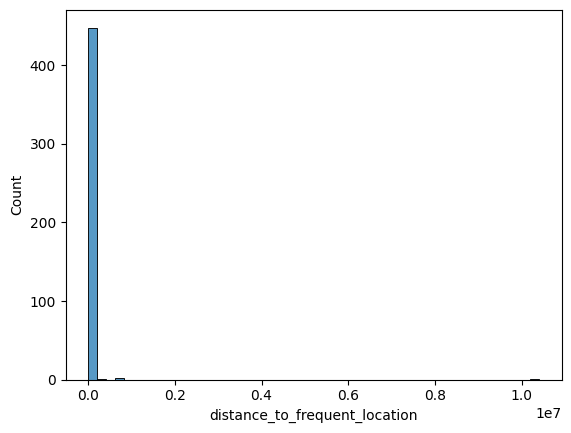

In [ ]:
sns.histplot(data = medium_risk, x = 'distance_to_frequent_location', bins = 50)

We clearly see there are outliers that make harder to carry out the anlysis.

In [ ]:
# Create bins for the medium_risk variable
bins = pd.cut(medium_risk['distance_to_frequent_location'], bins=[0, 500 , 1000, 10000, 500000, 11000000], include_lowest=True)

# Count the number of values in each bin
print(bins.value_counts(sort=False))


(-0.001, 500.0]           391
(500.0, 1000.0]            14
(1000.0, 10000.0]          33
(10000.0, 500000.0]        11
(500000.0, 11000000.0]      3
Name: distance_to_frequent_location, dtype: int64


<Axes: xlabel='distance_to_frequent_location', ylabel='Count'>

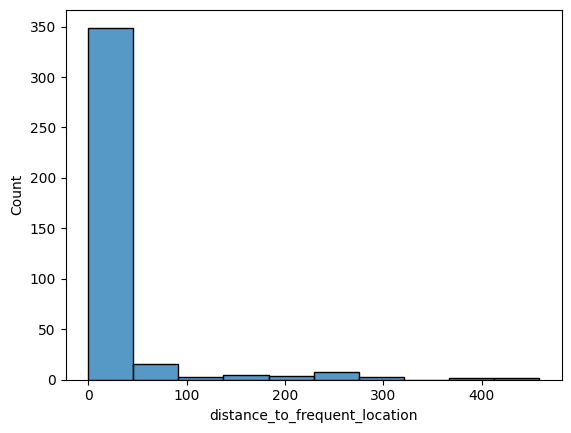

In [ ]:
dist_no_outlier = medium_risk[medium_risk['distance_to_frequent_location'] < 500].sort_values('distance_to_frequent_location', ascending = True)
sns.histplot(data = dist_no_outlier, x = 'distance_to_frequent_location', bins = 10)

Many of the records have distance inferior to 5Km.

In [ ]:
medium_risk['distance_to_frequent_location'].describe().round(2)

count         452.00
mean        27821.15
std        491957.38
min             0.00
25%             2.08
50%             6.29
75%            29.46
max      10405592.61
Name: distance_to_frequent_location, dtype: float64

In [ ]:
medium_risk['has_root_permissions'].value_counts(normalize = True)*100

True    100.0
Name: has_root_permissions, dtype: float64

In [ ]:
low_risk = df[df['risk_level'] == 0].sort_values("qty_same_device", ascending = False)
low_risk

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
116840,d07f2fb8-9536,1538111093,1599002029,3.139975,10,False,False,False,True,2021-07-09 18:05:26.386,36,0
131601,ea87e5b5-ae4b,87795924,1599002029,1.962673,7,False,False,False,True,2021-07-06 02:38:02.995,36,0
387838,536d3bd1-6e0d,1579452445,1599002029,4.589244,25,False,False,False,True,2021-07-25 01:20:17.882,36,0
47218,eb74236a-6a45,522769103,1599002029,1.501790,2,False,False,False,True,2021-07-01 18:43:44.751,36,0
212269,61535a49-5fb3,356074081,1599002029,2.354982,10,False,False,False,True,2021-07-09 15:10:26.216,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...
210758,874ec498-690c,410429616,1721556025,1.890316,71,False,False,False,True,2021-07-24 14:26:48.421,1,0
210759,85d58337-8a1f,1249637530,1794180112,0.422809,51,False,False,False,True,2021-07-24 14:58:56.246,1,0
210762,6a112e98-7014,772013123,1048855425,10.377386,223,False,False,False,True,2021-07-15 21:04:48.293,1,0
210763,7d0d0f57-c9f6,1387491940,1397694249,1.257901,40,False,False,False,True,2021-07-02 22:39:50.034,1,0


In [ ]:
low_risk['has_root_permissions'].value_counts(normalize = True)*100

False    100.0
Name: has_root_permissions, dtype: float64

In [ ]:
low_risk['app_is_from_official_store'].value_counts(normalize = True)*100

True     99.864526
False     0.135474
Name: app_is_from_official_store, dtype: float64

In [ ]:
low_risk[low_risk['app_is_from_official_store'] == False]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
76372,3336dd65-886f,492216263,353649770,1.111951,13,False,False,False,False,2021-07-05 13:56:34.889,9,0
46537,28fc3d0f-c95a,684978592,1131641576,990.732792,454,False,False,False,False,2021-07-27 13:09:29.971,9,0
396107,755ae1a8-74e4,1855929361,353649770,0.744363,16,False,False,False,False,2021-07-08 10:10:50.731,9,0
121045,ca09e222-ea74,1595245117,1131641576,4.690250,445,False,False,False,False,2021-07-17 19:07:06.207,9,0
265922,fafb5172-cae8,99796785,1131641576,0.496097,430,False,False,False,False,2021-07-03 14:47:10.502,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
215973,1a78e725-901d,2049777030,143153460,1.898442,87,False,False,False,False,2021-07-04 19:15:55.577,1,0
215762,fd126e1f-ba8c,71652016,1785846277,3396.681879,3,False,False,False,False,2021-07-20 19:08:19.098,1,0
209258,dc9d2b7e-8f9a,999064214,1024653637,24.820924,60,False,False,False,False,2021-07-11 18:00:52.436,1,0
208579,8018655d-0d7f,355087762,1904206945,2.688554,0,False,False,False,False,2021-07-18 19:21:27.124,1,0


In [ ]:
low_risk['device_age_days'].mean()

202.72767826953336

In [ ]:
low_risk['distance_to_frequent_location'].mean()

5234.827189190496

In [ ]:
low_risk['distance_to_frequent_location'].median()

5.953812066860984

Based on how the data was divided, we conclude that each group have similar patterns : 
- High Risk :  both root_permissions and emulator, young device age, one event per device;
- Medium Risk : app is not from official store, higher qty of event per device : 9 ;
- Low_risk : app is from official_store, older device age, highest qty of events

## Including records with missing distance

In [ ]:
df.head()

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
0,59bcca18-c726,1893155083,1801928094,1.852865,527,False,False,False,True,2021-07-12 22:34:44.228,1,0
1,64c883df-2a7b,2050114867,1971517057,36.260014,184,False,False,False,True,2021-07-08 15:07:32.352,4,0
2,527f8468-6a6a,422735906,1956878295,226.411294,92,False,False,False,True,2021-07-12 22:10:05.052,4,0
3,e062b8d9-6b5a,1766209306,1208828324,0.110275,366,False,False,False,True,2021-07-13 00:05:45.445,3,0
4,a5099dd8-ac00,1860027669,1768952722,1.732900,278,False,False,False,True,2021-07-20 14:47:40.766,1,0


In [ ]:
df_missing['qty_same_device'] = df_missing.groupby('device')['device'].transform('count')
df_missing.head()

<ipython-input-67-9acad4512c75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_missing['qty_same_device'] = df_missing.groupby('device')['device'].transform('count')


,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device
316,d9f1bd6a-0ed3,765518161,1921744396,NaN,0,False,False,False,True,2021-07-28 01:08:39.270,1
514,2a606bb8-635d,999839408,2133620111,NaN,0,False,False,False,True,2021-07-20 23:32:21.563,1
802,5bbb3749-d4e9,1802045378,908005998,NaN,2,False,False,False,True,2021-07-14 20:28:09.343,1
1628,6b2670c6-d32d,1096280190,1975585989,NaN,24,False,False,False,True,2021-07-06 02:37:03.810,1
2221,13f67e20-9ce9,332838423,942203533,NaN,123,False,False,False,True,2021-07-29 16:04:02.501,1


In [ ]:
for col in df_missing.select_dtypes(include=bool):
    print(col)
    print(df_missing[col].value_counts(normalize=True) * 100)

is_emulator
False    100.0
Name: is_emulator, dtype: float64
has_fake_location
False    100.0
Name: has_fake_location, dtype: float64
has_root_permissions
False    99.557522
True      0.442478
Name: has_root_permissions, dtype: float64
app_is_from_official_store
True     99.557522
False     0.442478
Name: app_is_from_official_store, dtype: float64


In [ ]:
df_missing[df_missing['has_root_permissions'] == True]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device
17339,0c2b9a7f-94e6,1345104690,314632218,NaN,0,False,False,True,True,2021-07-23 19:49:44.463,1
191550,195cf0af-b0be,727433780,2134275963,NaN,0,False,False,True,True,2021-07-26 12:15:50.562,1
231045,3e3252af-944f,353669857,1321910024,NaN,0,False,False,True,True,2021-07-01 03:48:12.414,1


In [ ]:
common_devices = df[df['device'].isin(df_missing['device'])]
common_devices

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
1705,de6e9476-c938,505568698,871525083,1.109323,4,False,False,False,True,2021-07-22 22:31:21.735,3,0
3520,7ee44483-a25c,885371360,1534520961,7.316776,13,False,False,False,True,2021-07-15 19:35:50.669,4,0
5871,8f1efdc7-8795,1949587790,1685410522,4.003023,29,False,False,False,True,2021-07-30 19:55:52.003,3,0
17285,d49e805d-9847,1045949869,1591590621,0.000000,116,False,False,False,True,2021-07-17 11:47:58.700,3,0
20349,b135e471-f415,1367617139,1355981171,0.111195,128,False,False,False,True,2021-07-11 15:55:28.019,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
420845,48f1f736-d2ad,1331237136,436560946,3.763975,465,False,False,False,True,2021-07-15 23:57:45.173,2,0
421287,953e105f-c24b,637581163,1947057851,6.499377,31,False,False,False,True,2021-07-02 23:15:10.883,2,0
422878,92f334f0-601d,977741743,790349149,27.110048,179,False,False,False,True,2021-07-25 22:26:15.000,3,0
436465,2816d609-3f0b,1793275846,1299400458,0.111195,31,False,False,False,True,2021-07-09 14:55:25.045,3,0


In [ ]:
df_final = pd.concat([df, df_missing])

In [ ]:
df_final.shape

(444758, 12)

In [ ]:
df_final.loc[df_final['risk_level'].isnull()]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
316,d9f1bd6a-0ed3,765518161,1921744396,NaN,0,False,False,False,True,2021-07-28 01:08:39.270,1,NaN
514,2a606bb8-635d,999839408,2133620111,NaN,0,False,False,False,True,2021-07-20 23:32:21.563,1,NaN
802,5bbb3749-d4e9,1802045378,908005998,NaN,2,False,False,False,True,2021-07-14 20:28:09.343,1,NaN
1628,6b2670c6-d32d,1096280190,1975585989,NaN,24,False,False,False,True,2021-07-06 02:37:03.810,1,NaN
2221,13f67e20-9ce9,332838423,942203533,NaN,123,False,False,False,True,2021-07-29 16:04:02.501,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
441485,ef384db5-9ce0,1908992445,1204802355,NaN,0,False,False,False,True,2021-07-24 13:38:28.551,2,NaN
442825,4e080ea7-2f7b,241283599,524905774,NaN,0,False,False,False,True,2021-07-27 16:45:25.681,1,NaN
443665,3f5632f0-63d7,1978670569,1163192545,NaN,6,False,False,False,True,2021-07-28 21:39:26.905,1,NaN
443778,e3d7a001-c381,291688591,1735189466,NaN,78,False,False,False,True,2021-07-31 10:46:30.469,1,NaN


In [ ]:
df_final['qty_same_device'] = df_final.groupby('device')['device'].transform('count')

In [ ]:
df_final.loc[df_final['risk_level'].isnull()]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
316,d9f1bd6a-0ed3,765518161,1921744396,NaN,0,False,False,False,True,2021-07-28 01:08:39.270,1,NaN
514,2a606bb8-635d,999839408,2133620111,NaN,0,False,False,False,True,2021-07-20 23:32:21.563,1,NaN
802,5bbb3749-d4e9,1802045378,908005998,NaN,2,False,False,False,True,2021-07-14 20:28:09.343,1,NaN
1628,6b2670c6-d32d,1096280190,1975585989,NaN,24,False,False,False,True,2021-07-06 02:37:03.810,1,NaN
2221,13f67e20-9ce9,332838423,942203533,NaN,123,False,False,False,True,2021-07-29 16:04:02.501,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
441485,ef384db5-9ce0,1908992445,1204802355,NaN,0,False,False,False,True,2021-07-24 13:38:28.551,2,NaN
442825,4e080ea7-2f7b,241283599,524905774,NaN,0,False,False,False,True,2021-07-27 16:45:25.681,1,NaN
443665,3f5632f0-63d7,1978670569,1163192545,NaN,6,False,False,False,True,2021-07-28 21:39:26.905,1,NaN
443778,e3d7a001-c381,291688591,1735189466,NaN,78,False,False,False,True,2021-07-31 10:46:30.469,1,NaN


In [ ]:
df_final.loc[(df_final['risk_level'].isnull()) & (df_final['has_root_permissions'] == True)]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
17339,0c2b9a7f-94e6,1345104690,314632218,NaN,0,False,False,True,True,2021-07-23 19:49:44.463,1,NaN
191550,195cf0af-b0be,727433780,2134275963,NaN,0,False,False,True,True,2021-07-26 12:15:50.562,1,NaN
231045,3e3252af-944f,353669857,1321910024,NaN,0,False,False,True,True,2021-07-01 03:48:12.414,1,NaN


In [ ]:
df_final.loc[(df_final['risk_level'] == 1) & (df_final['has_root_permissions'] == True)]


,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
839,1c5f142d-d7a5,1973823900,1149358814,0.801559,56,False,False,True,True,2021-07-04 12:40:26.110,2,1.0
2630,664841eb-8287,499310295,1799815822,0.313241,0,False,False,True,True,2021-07-01 13:33:29.436,3,1.0
2806,c0dec8be-cb89,925568691,1719382239,8.792622,222,False,False,True,True,2021-07-21 22:03:39.340,2,1.0
3172,245a7cf7-92c4,1279270096,711788054,2.703759,20,False,False,True,True,2021-07-26 00:51:04.096,1,1.0
3255,79035df7-bc7c,1787645045,232161486,13.211861,121,False,False,True,True,2021-07-05 16:24:44.145,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440632,c3adc30f-89a2,785707024,578833575,2.730106,256,False,False,True,True,2021-07-02 22:01:58.978,1,1.0
440898,189b2526-6c56,1416324296,1378599910,32.056841,39,False,False,True,True,2021-07-26 13:08:15.267,1,1.0
442005,195d476e-9b8d,796566199,1607342218,0.469424,255,False,False,True,True,2021-07-04 18:10:56.543,1,1.0
442667,fd62a2a5-a5de,1961693452,705791721,7.042107,42,False,False,True,True,2021-07-10 15:40:37.771,1,1.0


In [ ]:
df_final.loc[df_final['has_fake_location'] == True]


,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
25321,b088b27f-7a2b,840631489,1651576398,1.509540e+00,214,False,True,False,True,2021-07-05 20:15:33.496,7,0.0
42171,6323245d-f6dc,1945595112,1551785732,1.223500e+03,89,False,True,False,True,2021-07-07 22:57:40.995,2,0.0
49635,6f317453-c52a,1903014933,147903886,5.531779e-01,278,False,True,False,True,2021-07-31 11:51:49.353,2,0.0
50145,d4da48bf-f0bc,293086986,1346672749,2.694603e+00,101,False,True,False,True,2021-07-24 17:44:38.178,3,0.0
51616,cedb288a-f236,678636199,2076524354,6.072727e+00,127,False,True,False,True,2021-07-05 11:33:17.983,2,0.0
61538,e881d8ba-f268,1780756034,1346672749,1.047565e+06,96,False,True,False,True,2021-07-19 20:03:07.755,3,0.0
62879,61fb0789-817a,416973145,52550735,2.248528e+01,10,False,True,False,True,2021-07-16 19:22:50.030,2,0.0
98035,53e38899-b062,349756044,1331779767,1.556678e+02,228,False,True,False,True,2021-07-05 22:17:29.739,1,0.0
100865,5f4634ee-ece8,1111218416,385018669,5.443217e-01,25,False,True,False,True,2021-07-05 16:06:02.583,1,0.0
106802,2256bc88-a4fc,292113390,88770484,1.240459e+00,273,False,True,False,True,2021-07-27 12:03:52.042,6,0.0


In [ ]:
df_final.loc[df_final['has_fake_location'] == True, 'risk_level'] = 1
df_final.loc[df_final['distance_to_frequent_location'].isnull(), 'risk_level'] = 1

In [ ]:
df_final.loc[(df_final['risk_level'] ==0) & (df_final['app_is_from_official_store'] == False), 'risk_level'] = 1

# Final division

In [ ]:
df_final['risk_level'].value_counts(normalize = True)

0.0    0.996029
1.0    0.003966
2.0    0.000004
Name: risk_level, dtype: float64

<Axes: xlabel='risk_level', ylabel='count'>

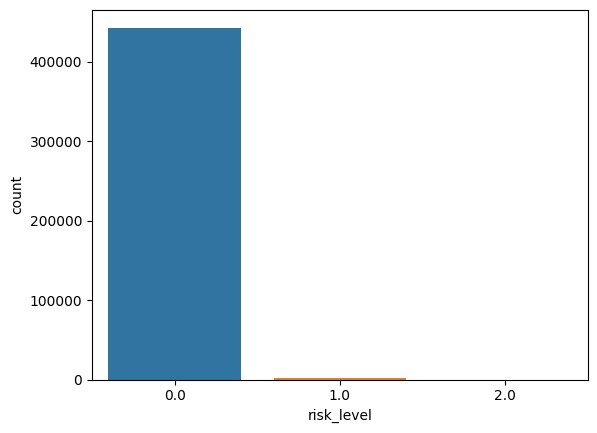

In [ ]:
sns.countplot(data = df_final, x = 'risk_level')

In [ ]:
df_final[df_final['risk_level'] ==1]

,event_id,account_id,device,distance_to_frequent_location,device_age_days,is_emulator,has_fake_location,has_root_permissions,app_is_from_official_store,data,qty_same_device,risk_level
839,1c5f142d-d7a5,1973823900,1149358814,0.801559,56,False,False,True,True,2021-07-04 12:40:26.110,2,1.0
1671,d02b197a-9fa5,564935357,1211842529,19.987921,92,False,False,False,False,2021-07-04 10:21:00.770,7,1.0
2242,93aa2463-e792,949536148,1022639456,49.796043,57,False,False,False,False,2021-07-25 01:03:08.108,3,1.0
2630,664841eb-8287,499310295,1799815822,0.313241,0,False,False,True,True,2021-07-01 13:33:29.436,3,1.0
2762,2002c612-e6fd,1345859648,1854599133,1.401492,4,False,False,False,False,2021-07-11 14:42:53.434,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
441485,ef384db5-9ce0,1908992445,1204802355,NaN,0,False,False,False,True,2021-07-24 13:38:28.551,2,1.0
442825,4e080ea7-2f7b,241283599,524905774,NaN,0,False,False,False,True,2021-07-27 16:45:25.681,1,1.0
443665,3f5632f0-63d7,1978670569,1163192545,NaN,6,False,False,False,True,2021-07-28 21:39:26.905,1,1.0
443778,e3d7a001-c381,291688591,1735189466,NaN,78,False,False,False,True,2021-07-31 10:46:30.469,1,1.0


In [ ]:
df_final[df_final['risk_level'] ==0].describe()

,account_id,device,distance_to_frequent_location,device_age_days,qty_same_device,risk_level
count,4.429920e+05,4.429920e+05,4.429920e+05,442992.000000,442992.000000,442992.0
mean,1.073298e+09,1.072672e+09,5.229711e+03,202.884129,2.274752,0.0
std,6.199132e+08,6.196494e+08,9.856065e+04,168.641875,1.739964,0.0
min,1.552000e+03,1.960300e+04,0.000000e+00,0.000000,1.000000,0.0
25%,5.361105e+08,5.360937e+08,1.847684e+00,61.000000,1.000000,0.0
50%,1.072478e+09,1.072872e+09,5.954789e+00,157.000000,2.000000,0.0
75%,1.610137e+09,1.611273e+09,3.076724e+01,308.000000,3.000000,0.0
max,2.147478e+09,2.147470e+09,1.542475e+07,550.000000,36.000000,0.0


Based on the previous analysis, we conclude that each group have the following patterns : 
- High Risk :  Emulator
- Medium Risk : app is not from official store, fake_location, root_permissions;
- Low_risk : app is from official_store, older device age, highest qty of events

In [ ]:
mapping = {0: 'low_risk', 1: 'medium_risk', 2: 'high_risk'}

df_final['risk_level'] = df_final['risk_level'].replace(mapping)

In [ ]:
df_final.to_csv('final_dataset_incognia.csv', index=False)